In [69]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [70]:
df=pd.read_csv("medical_dataset.csv")
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306          328         Urgent     2024-02-02  Paracetamol   
1    33643.327287          265      Emergency     2019-08-26    Ibuprofen   
2    27955.096079          205      Emergency     2022-10-07      Aspirin   
3    37909.782410          450       Elective     2020-12-18    Ibuprofen   
4    14238.317814          458         Urgent     2022-10-09   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

**Exploratory Data Analysis**

In [71]:
df.shape

(55500, 15)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [73]:
df.describe()

Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

In [74]:
# Check for missing values
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [75]:
# To check repeated values
print(df.duplicated().sum())

534


In [76]:
numerical_column_names = df.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['Age', 'Billing Amount', 'Room Number']


In [77]:
object_column_names = df.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


In [78]:
num_duplicates = df.duplicated().sum()
print("Number of duplicated rows:", num_duplicates)

Number of duplicated rows: 534


In [79]:
duplicated_rows = df[df.duplicated()]
print("Indices of Duplicated Rows:", duplicated_rows.index.tolist())

Indices of Duplicated Rows: [50023, 50040, 50055, 50070, 50078, 50081, 50086, 50090, 50095, 50102, 50103, 50116, 50120, 50124, 50137, 50147, 50151, 50159, 50171, 50180, 50182, 50187, 50190, 50216, 50226, 50242, 50247, 50253, 50272, 50312, 50314, 50320, 50325, 50337, 50347, 50350, 50353, 50362, 50366, 50370, 50373, 50391, 50445, 50463, 50469, 50477, 50478, 50489, 50521, 50522, 50524, 50525, 50532, 50551, 50559, 50567, 50596, 50602, 50603, 50604, 50611, 50623, 50624, 50625, 50629, 50645, 50660, 50684, 50699, 50710, 50719, 50723, 50731, 50743, 50749, 50755, 50760, 50765, 50766, 50782, 50786, 50789, 50795, 50802, 50830, 50848, 50871, 50914, 50919, 50924, 50948, 50958, 50965, 50973, 50983, 50985, 50996, 51005, 51016, 51023, 51028, 51036, 51044, 51059, 51067, 51069, 51075, 51091, 51098, 51121, 51122, 51124, 51125, 51135, 51137, 51146, 51158, 51161, 51173, 51180, 51185, 51192, 51200, 51229, 51240, 51246, 51264, 51277, 51294, 51298, 51315, 51319, 51334, 51345, 51347, 51355, 51356, 51372, 51377

In [80]:
df=df.drop_duplicates()

In [81]:
print("Number of duplicated rows:",df.duplicated().sum())

Number of duplicated rows: 0


In [82]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

<ipython-input-82-2b559b852218>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
print("The Average age of Patients:",df['Age'].mean().round(2))

The Average age of Patients: 51.54


In [84]:
print("Most frequent visit of Gender:",df['Gender'].mode()[0])

Most frequent visit of Gender: Male


In [85]:
print("People with most Blood Type:",df['Blood Type'].mode()[0])

People with most Blood Type: A-


In [86]:
print("Most frequent Insurance Provider:",df['Insurance Provider'].mode()[0])

Most frequent Insurance Provider: Cigna


In [87]:
print("Frequent Doctor visits:",df['Doctor'].mode()[0])

Frequent Doctor visits: Michael Smith


In [88]:
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
print("The Average length of Patient Stay is:",df['Length of Stay'].mean().round(2),"days")

The Average length of Patient Stay is: 15.5 days


In [89]:
print("People with frequent Medical Condition:",df['Medical Condition'].mode()[0])

People with frequent Medical Condition: Arthritis


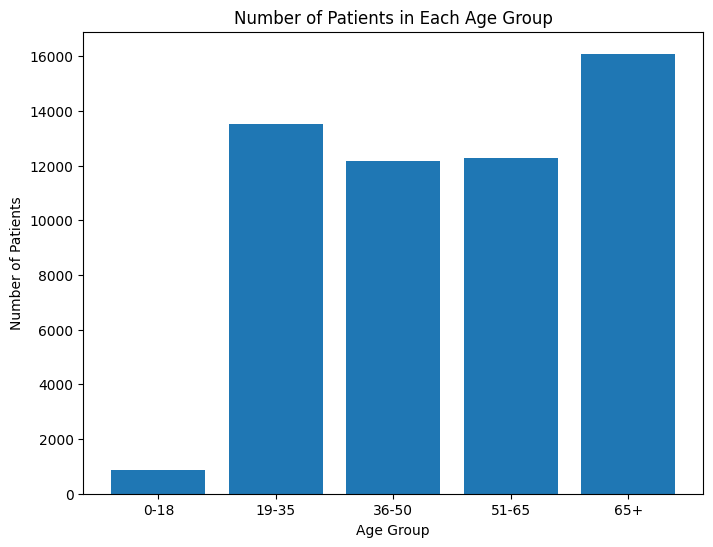

In [90]:
# Define age groups
age_bins = [0, 18, 35, 50, 65, float('inf')]
age_labels = ['0-18', '19-35', '36-50', '51-65', '65+']

# Create Age Group column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Count patients in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Plot bar chart for patient counts in each age group
plt.figure(figsize=(8, 6))
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Number of Patients in Each Age Group')
plt.show()

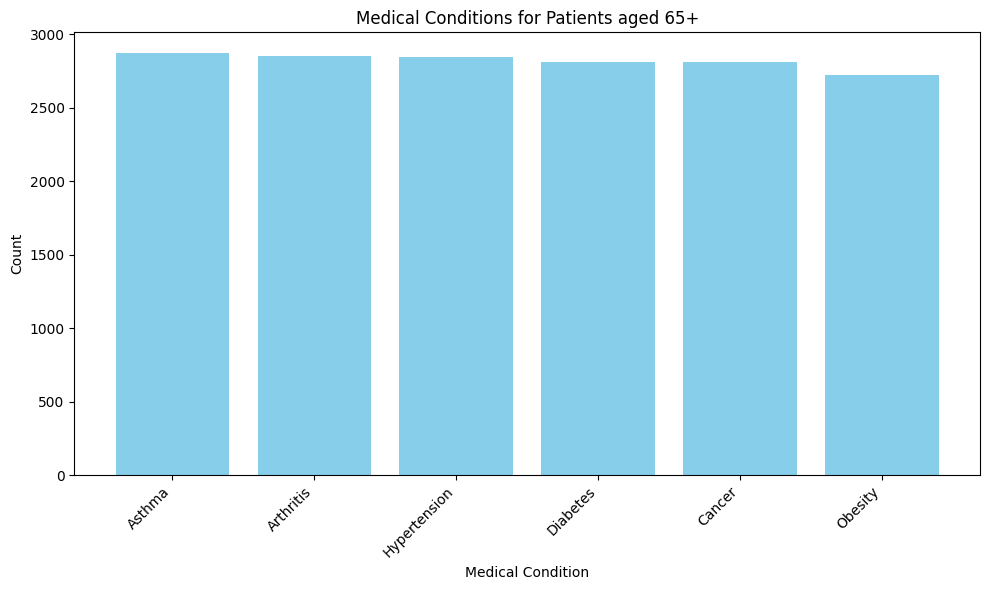

In [91]:
# Filter data for patients aged 65 and above
age_group_65plus = df[df['Age'] >= 65]

# Count occurrences of medical conditions for patients aged 65+
condition_counts_65plus = age_group_65plus['Medical Condition'].value_counts()

# Plot histogram for medical conditions of patients aged 65+
plt.figure(figsize=(10, 6))
plt.bar(condition_counts_65plus.index, condition_counts_65plus.values, color='skyblue')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Medical Conditions for Patients aged 65+')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

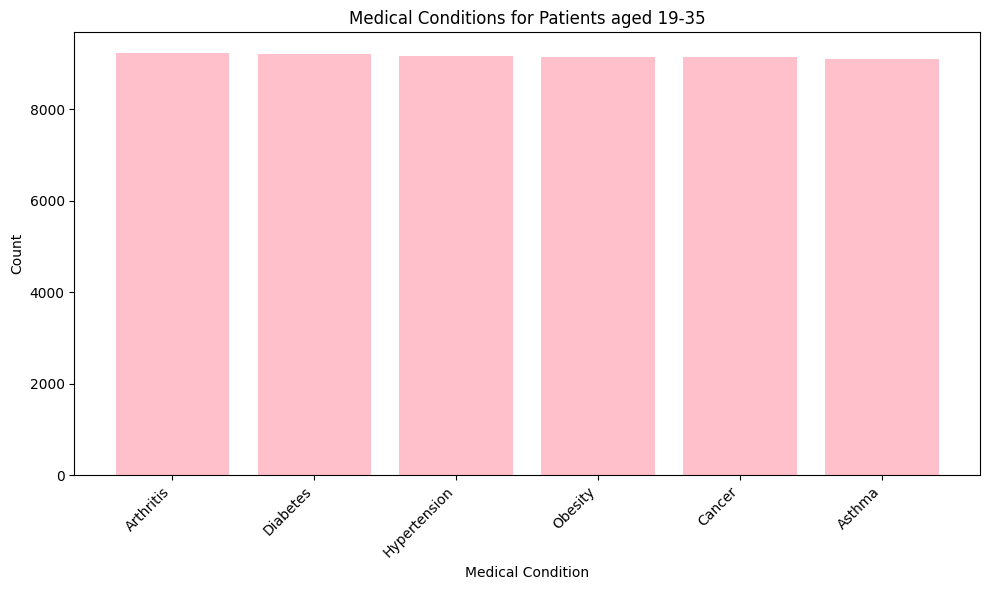

In [92]:
# Filter data for patients aged 19-35 and above
age_group_65plus = df[df['Age'] >= 19-35]

# Count occurrences of medical conditions for patients aged 19-35
condition_counts_65plus = age_group_65plus['Medical Condition'].value_counts()

# Plot histogram for medical conditions of patients aged 19-35
plt.figure(figsize=(10, 6))
plt.bar(condition_counts_65plus.index, condition_counts_65plus.values, color='pink')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Medical Conditions for Patients aged 19-35')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

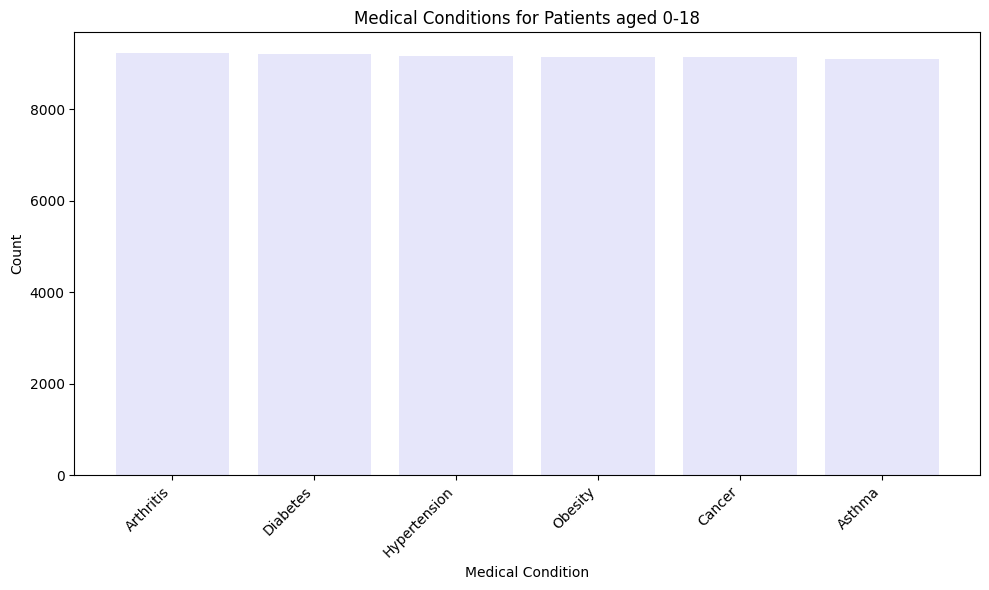

In [93]:
# Filter data for patients aged 0-18
age_group_65plus = df[df['Age'] >= 0-18]

# Count occurrences of medical conditions for patients aged 0-18
condition_counts_65plus = age_group_65plus['Medical Condition'].value_counts()

# Plot histogram for medical conditions of patients aged 0-18
plt.figure(figsize=(10, 6))
plt.bar(condition_counts_65plus.index, condition_counts_65plus.values, color='lavender')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Medical Conditions for Patients aged 0-18')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

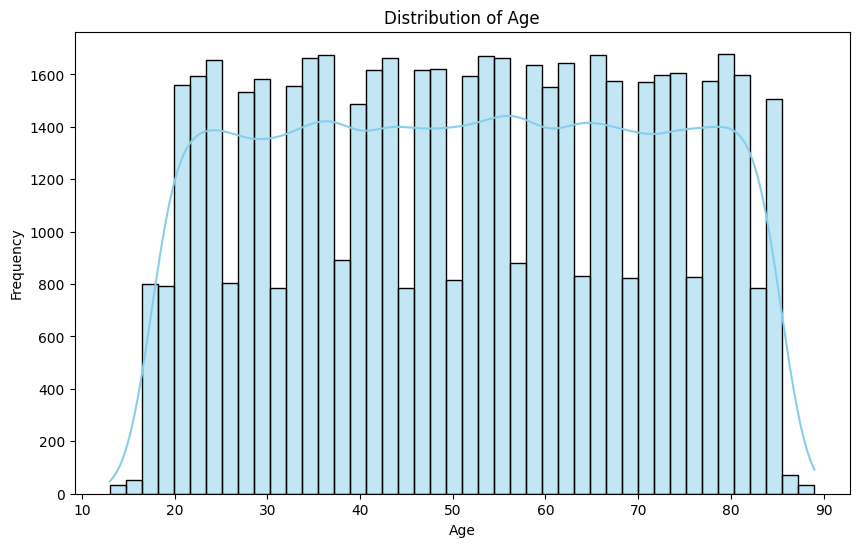

In [94]:
# Display the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [95]:
# Univariate Analysis
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index.tolist()
values = gender_counts.values.tolist()

colors = ['#1f77b4', '#ff7f0e']

fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values
)])

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='value',
    textfont_size=20,
    marker=dict(
        colors=colors,
        line=dict(color='#000000', width=2)
    )
)

fig.update_layout(
    title='Gender Distribution',
    autosize=False,
    width=600,
    height=400
)

fig.show()

In [96]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('Age', 'Billing Amount'))

fig.add_trace(go.Histogram(
    x=df['Age'],
    name='Age',
    marker_color='blue',
    opacity=0.75
), row=1, col=1)

fig.add_trace(go.Histogram(
    x=df['Billing Amount'],
    name='Billing Amount',
    marker_color='green',
    opacity=0.75
), row=1, col=2)

fig.update_layout(
    title_text='Distribution of Age and Billing Amount',
    xaxis_title='Age',
    yaxis_title='Frequency',
    xaxis2_title='Billing Amount',
    yaxis2_title='Frequency',
    width=1200,
    height=400
)

fig.show()

In [97]:
condition_counts = df['Medical Condition'].value_counts()
conditions = condition_counts.index.tolist()
counts = condition_counts.values.tolist()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

fig = go.Figure(data=[go.Bar(
    x=conditions,
    y=counts,
    marker_color=colors
)])

fig.update_layout(
    title='Medical Conditions',
    xaxis_title='Medical Condition',
    yaxis_title='Count',
    width=800,
    height=400
)

fig.show()

In [98]:
blood_type_counts = df['Blood Type'].value_counts()
blood_types = blood_type_counts.index.tolist()
counts = blood_type_counts.values.tolist()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

fig = go.Figure(data=[go.Bar(
    x=blood_types,
    y=counts,
    marker_color=colors[:len(blood_types)]
)])

fig.update_layout(
    title='Distribution of Blood Types',
    xaxis_title='Blood Type',
    yaxis_title='Count',
    width=800,
    height=400
)

fig.show()

In [99]:
insurance_counts = df['Insurance Provider'].value_counts()
insurance_providers = insurance_counts.index.tolist()
counts = insurance_counts.values.tolist()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig = go.Figure(data=[go.Bar(
    x=insurance_providers,
    y=counts,
    marker_color=colors[:len(insurance_providers)]
)])

fig.update_layout(
    title='Insurance Providers',
    xaxis_title='Insurance Provider',
    yaxis_title='Count',
    width=800,
    height=400,
    xaxis_tickangle=-45
)

fig.show()

In [100]:
medication_counts = df['Medication'].value_counts()
medications = medication_counts.index.tolist()
counts = medication_counts.values.tolist()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig = go.Figure(data=[go.Bar(
    x=medications,
    y=counts,
    marker_color=colors[:len(medications)]
)])

fig.update_layout(
    title='Medication',
    xaxis_title='Medication',
    yaxis_title='Count',
    width=800,
    height=400,
    xaxis_tickangle=-45
)

fig.show()

In [101]:
test_results_counts = df['Test Results'].value_counts()
test_results = test_results_counts.index.tolist()
counts = test_results_counts.values.tolist()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig = go.Figure(data=[go.Bar(
    x=test_results,
    y=counts,
    marker_color=colors[:len(test_results)]
)])

fig.update_layout(
    title='Test Results',
    xaxis_title='Test Result',
    yaxis_title='Count',
    width=800,
    height=400,
    xaxis_tickangle=-45
)

fig.show()

Bivariate Analysis

In [102]:
fig = px.histogram(df, x='Medical Condition', color='Admission Type',
                   color_discrete_sequence=px.colors.qualitative.Plotly,
                   title='Admission Type by Medical Condition',
                   labels={'Medical Condition': 'Medical Condition', 'Admission Type': 'Admission Type'},
                   barmode='group')

fig.update_layout(
    xaxis_title='Medical Condition',
    yaxis_title='Count',
    width=800,
    height=400
)

fig.show()

In [103]:
fig = px.histogram(df, x='Blood Type', color='Medical Condition',
                   color_discrete_sequence=px.colors.qualitative.Plotly,
                   title='Medical Conditions by Blood Type',
                   labels={'Blood Type': 'Blood Type', 'Medical Condition': 'Medical Condition'},
                   barmode='stack')

fig.update_layout(
    xaxis_title='Blood Type',
    yaxis_title='Count',
    width=800,
    height=400
)

fig.show()

In [104]:
fig = px.histogram(df, x='Medical Condition', color='Gender',
                   color_discrete_sequence=px.colors.qualitative.Plotly,
                   title='Medical Condition by Gender',
                   labels={'Medical Condition': 'Medical Condition', 'Gender': 'Gender'},
                   barmode='group')

fig.update_layout(
    xaxis_title='Medical Condition',
    yaxis_title='Count',
    width=800,
    height=400
)

fig.show()

In [105]:
fig = px.histogram(df, x='Insurance Provider', color='Medical Condition',
                   color_discrete_sequence=px.colors.qualitative.Plotly,
                   title='Medical Conditions by Insurance Provider',
                   labels={'Insurance Provider': 'Insurance Provider', 'Medical Condition': 'Medical Condition'},
                   barmode='stack')

fig.update_layout(
    xaxis_title='Insurance Provider',
    yaxis_title='Count',
    width=800,
    height=400
)

fig.show()

In [106]:
fig = px.histogram(df, x='Admission Type', color='Test Results',
                   color_discrete_sequence=px.colors.qualitative.Plotly,
                   title='Test Results by Admission Type',
                   labels={'Admission Type': 'Admission Type', 'Test Results': 'Test Results'},
                   barmode='stack')

fig.update_layout(
    xaxis_title='Admission Type',
    yaxis_title='Count',
    width=800,
    height=400
)

fig.show()

Correlation

In [107]:
numeric_data = df.select_dtypes(include=[float, int])
corr_matrix = numeric_data.corr()
corr_matrix

Age  Billing Amount  Room Number  Length of Stay
Age             1.000000       -0.003427    -0.000352        0.007890
Billing Amount -0.003427        1.000000    -0.003930       -0.004891
Room Number    -0.000352       -0.003930     1.000000       -0.004540
Length of Stay  0.007890       -0.004891    -0.004540        1.000000

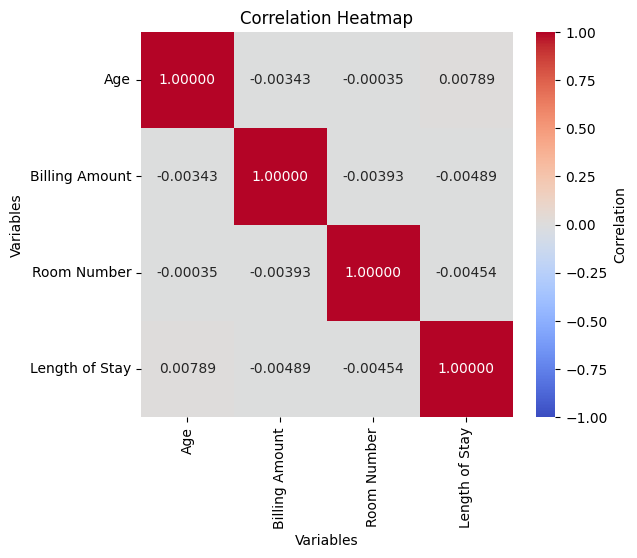

In [108]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.5f',
            cbar_kws={'label': 'Correlation'})

plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


In [109]:
# Top 10 Hospital by Admission Rate
hospital_counts = df['Hospital'].value_counts()

top_10_hospitals = hospital_counts.head(10)

fig = px.bar(top_10_hospitals,
             x=top_10_hospitals.values,
             y=top_10_hospitals.index,
             title='Top 10 Hospitals based on Admissions',
             labels={'x': 'Number of Admissions', 'y': 'Hospital'},
             orientation='h',
             color=top_10_hospitals.index,
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
    xaxis_title='Number of Admissions',
    yaxis_title='Hospital',
    width=800,
    height=400
)


In [110]:
# Top 10 Doctor by Cases Handled
doctor_counts = df['Doctor'].value_counts()

top_10_doctors = doctor_counts.head(10)

fig = px.bar(top_10_doctors,
             x=top_10_doctors.values,
             y=top_10_doctors.index,
             title='Top 10 Doctors by Cases Handled',
             labels={'x': 'Number of Cases', 'y': 'Doctor'},
             orientation='h',
             color=top_10_doctors.index,
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
    xaxis_title='Number of Cases',
    yaxis_title='Doctor',
    width=800,
    height=400
)

fig.show()

In [111]:
# Top 10 Hospital by Billing Amount¶
hospital_billing = df.groupby('Hospital')['Billing Amount'].sum()

top_10_hospitals_billing = hospital_billing.sort_values(ascending=False).head(10)

fig = px.bar(top_10_hospitals_billing,
             x=top_10_hospitals_billing.values,
             y=top_10_hospitals_billing.index,
             title='Top 10 Hospitals by Billing Amount',
             labels={'x': 'Total Billing Amount', 'y': 'Hospital'},
             orientation='h',
             color=top_10_hospitals_billing.index,
             color_discrete_sequence=px.colors.qualitative.Plotly)

fig.update_layout(
    xaxis_title='Total Billing Amount',
    yaxis_title='Hospital',
    width=800,
    height=400
)
fig.show()

**Prediction Model**

In [112]:
df.drop(['Name', 'Doctor', 'Insurance Provider','Billing Amount', 'Room Number','Hospital'], axis=1, inplace=True)

In [113]:
df.head()

Age  Gender Blood Type Medical Condition Date of Admission Admission Type  \
0   30    Male         B-            Cancer        2024-01-31         Urgent   
1   62    Male         A+           Obesity        2019-08-20      Emergency   
2   76  Female         A-           Obesity        2022-09-22      Emergency   
3   28  Female         O+          Diabetes        2020-11-18       Elective   
4   43  Female        AB+            Cancer        2022-09-19         Urgent   

  Discharge Date   Medication  Test Results  Length of Stay Age Group  
0     2024-02-02  Paracetamol        Normal               2     19-35  
1     2019-08-26    Ibuprofen  Inconclusive               6     51-65  
2     2022-10-07      Aspirin        Normal              15       65+  
3     2020-12-18    Ibuprofen      Abnormal              30     19-35  
4     2022-10-09   Penicillin      Abnormal              20     36-50

In [114]:
# Convert Date of Admission and Discharge Date to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [115]:
df.head()

Age  Gender Blood Type Medical Condition Date of Admission Admission Type  \
0   30    Male         B-            Cancer        2024-01-31         Urgent   
1   62    Male         A+           Obesity        2019-08-20      Emergency   
2   76  Female         A-           Obesity        2022-09-22      Emergency   
3   28  Female         O+          Diabetes        2020-11-18       Elective   
4   43  Female        AB+            Cancer        2022-09-19         Urgent   

  Discharge Date   Medication  Test Results  Length of Stay Age Group  
0     2024-02-02  Paracetamol        Normal               2     19-35  
1     2019-08-26    Ibuprofen  Inconclusive               6     51-65  
2     2022-10-07      Aspirin        Normal              15       65+  
3     2020-12-18    Ibuprofen      Abnormal              30     19-35  
4     2022-10-09   Penicillin      Abnormal              20     36-50

In [116]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

categorical_cols = []
for col in df.columns:
    if df[col].dtypes == 'object':
        categorical_cols.append(col)
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()

Age  Gender  Blood Type  Medical Condition Date of Admission  \
0   30       1           5                  2        2024-01-31   
1   62       1           0                  5        2019-08-20   
2   76       0           1                  5        2022-09-22   
3   28       0           6                  3        2020-11-18   
4   43       0           2                  2        2022-09-19   

   Admission Type Discharge Date  Medication  Test Results  Length of Stay  \
0               2     2024-02-02           3             2               2   
1               1     2019-08-26           1             1               6   
2               1     2022-10-07           0             2              15   
3               0     2020-12-18           1             0              30   
4               2     2022-10-09           4             0              20   

  Age Group  
0     19-35  
1     51-65  
2       65+  
3     19-35  
4     36-50

In [117]:
df.head()

Age  Gender  Blood Type  Medical Condition Date of Admission  \
0   30       1           5                  2        2024-01-31   
1   62       1           0                  5        2019-08-20   
2   76       0           1                  5        2022-09-22   
3   28       0           6                  3        2020-11-18   
4   43       0           2                  2        2022-09-19   

   Admission Type Discharge Date  Medication  Test Results  Length of Stay  \
0               2     2024-02-02           3             2               2   
1               1     2019-08-26           1             1               6   
2               1     2022-10-07           0             2              15   
3               0     2020-12-18           1             0              30   
4               2     2022-10-09           4             0              20   

  Age Group  
0     19-35  
1     51-65  
2       65+  
3     19-35  
4     36-50

In [118]:
df1=df.drop(['Age Group','Date of Admission','Discharge Date'],axis=1)

In [119]:
df1.head()

Age  Gender  Blood Type  Medical Condition  Admission Type  Medication  \
0   30       1           5                  2               2           3   
1   62       1           0                  5               1           1   
2   76       0           1                  5               1           0   
3   28       0           6                  3               0           1   
4   43       0           2                  2               2           4   

   Test Results  Length of Stay  
0             2               2  
1             1               6  
2             2              15  
3             0              30  
4             0              20

In [120]:
# Assuming 'Test Result' is your target variable
x=df1.drop(['Test Results'], axis=1)  # Features
y = df1['Test Results']  # Target variable

In [121]:
x.head()

Age  Gender  Blood Type  Medical Condition  Admission Type  Medication  \
0   30       1           5                  2               2           3   
1   62       1           0                  5               1           1   
2   76       0           1                  5               1           0   
3   28       0           6                  3               0           1   
4   43       0           2                  2               2           4   

   Length of Stay  
0               2  
1               6  
2              15  
3              30  
4              20

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, y_test are already defined after data splitting

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.43      0.43      1889
           1       0.41      0.42      0.41      1761
           2       0.43      0.41      0.42      1847

    accuracy                           0.42      5497
   macro avg       0.42      0.42      0.42      5497
weighted avg       0.42      0.42      0.42      5497


Confusion Matrix:
[[821 546 522]
 [526 742 493]
 [549 541 757]]


In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=10000)

# Train the model
logreg_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(x_test)

# Calculate the accuracy of the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Model Accuracy:", accuracy_logreg)

Logistic Regression Model Accuracy: 0.33836638166272515
